center of mass for a system of particles
---

$R=\frac{1}{M}\sum_{i=1}^n{m_i r_i}$

- R: center of mass
- M: sum of all masses

angular momentum 
---

$L=r\times p=m r\times v$

In [98]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
if 1:
    r_3d,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
else:
    r_3d,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [100]:
m_ges=m1+m2
r_vec=np.array([[x],[y],[z]])

In [101]:
#calculate the center of mass R with different distances
R_dist=np.sum(m_ges*r_3d)/np.sum(m_ges)
R_vec=np.sum(m_ges*r_vec)/np.sum(m_ges) #berechnet am ende Rx+Ry+Rz als Absolutwert, also falsch
R_x=np.sum(m_ges*x)/np.sum(m_ges)
R_y=np.sum(m_ges*y)/np.sum(m_ges)
R_z=np.sum(m_ges*z)/np.sum(m_ges)
R_vector=np.array([[R_x],[R_y],[R_z]])
R_vecabs=np.sqrt(R_x**2+R_y**2+R_z**2)

In [102]:
print('R_abs='+str(R_dist), 'R_vector='+str(R_vector), 'R_absvector='+str(R_vecabs))

('R_abs=5.94502430145', 'R_vector=[[ 0.00379773]\n [-0.0080373 ]\n [-0.0035875 ]]', 'R_absvector=0.00958599080917')


In [103]:
print(x[0],y[0],z[0], r_3d[0])
#the center of mass is neither (0,0,0) nor the position of the black hole 

(0.00014301099999999999, -0.00014474299999999999, -7.9899600000000003e-05, 0.00021860200000000001)


In [104]:
#calculate momentum of components
p_x=m_ges*vx
p_y=m_ges*vy
p_z=m_ges*vz

#calculate momentum of spherical components 
#p_r=m_ges*v_r
#p_theta=m_ges*v_theta
#p_phi=m_ges*v_phi

theta=np.arcsin(z/r_3d)
phi=np.arctan2(y,x)

#calculate the angular momentum in kartesian coordinates
L_kart=np.zeros([3,len(x)])
L_kart.shape=(len(x),3)
for n in range(len(x)):
    L_kart[n]=np.cross([x[n],y[n],z[n]],[p_x[n],p_y[n],p_z[n]])
    
#calculate angular momentum in polar coordinates
#L_pol=np.zero([len(x),3])
#for n in range(llen(x)):
#    L_pol[n]=np.cross([r_3d[n],theta[n],phi[n]],[p_r[n],p_theta[n],p_phi[n]])

In [105]:
L_kart

array([[ -1.48796611e+01,  -1.31210537e+01,  -2.86327516e+00],
       [  2.07941988e-02,   1.70401234e-01,  -1.51699844e-01],
       [ -4.14801227e-02,  -1.70786216e-01,  -5.75899838e-01],
       ..., 
       [ -3.64656883e+00,  -1.24647607e+01,   1.84599937e+01],
       [  2.23632783e+01,   3.02238806e+01,   8.34406028e+00],
       [  4.98459075e+01,   1.82731325e+01,   2.03787250e+01]])

In [106]:
L_1_kart=L_kart[:,0]
L_2_kart=L_kart[:,1]
L_3_kart=L_kart[:,2]

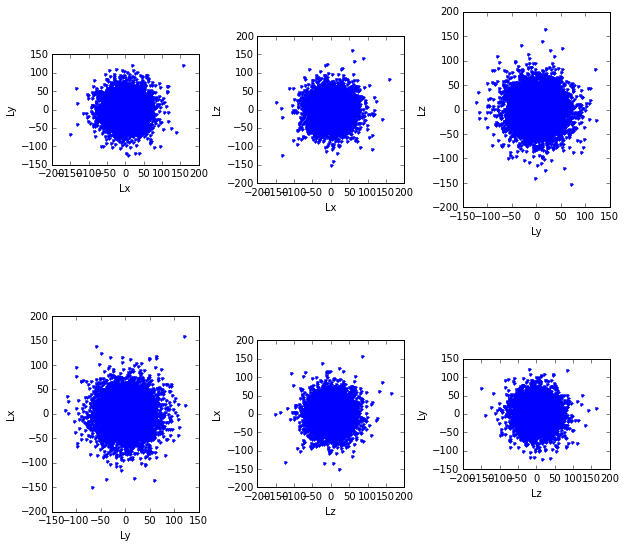

In [107]:
fig,axes=plt.subplots(nrows=2,ncols=3, figsize=(10,10))
axes[0,0].plot(L_1_kart,L_2_kart,'.')
axes[0,0].set_xlabel('Lx')
axes[0,0].set_ylabel('Ly')
axes[0,1].plot(L_1_kart,L_3_kart,'.')
axes[0,1].set_xlabel('Lx')
axes[0,1].set_ylabel('Lz')
axes[0,2].plot(L_2_kart,L_3_kart,'.')
axes[0,2].set_xlabel('Ly')
axes[0,2].set_ylabel('Lz')
axes[1,0].plot(L_2_kart,L_1_kart,'.')
axes[1,0].set_xlabel('Ly')
axes[1,0].set_ylabel('Lx')
axes[1,1].plot(L_3_kart,L_1_kart,'.')
axes[1,1].set_xlabel('Lz')
axes[1,1].set_ylabel('Lx')
axes[1,2].plot(L_3_kart,L_2_kart,'.')
axes[1,2].set_xlabel('Lz')
axes[1,2].set_ylabel('Ly')
axes[0,0].set_aspect('equal')
axes[0,1].set_aspect('equal')
axes[0,2].set_aspect('equal')
axes[1,0].set_aspect('equal')
axes[1,1].set_aspect('equal')
axes[1,2].set_aspect('equal')
fig.subplots_adjust(wspace=0.4)
